In [176]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.api.models import Sequential
from keras.api.layers import Dense

In [177]:
#%% Prepare the data
X = np.array([i for i in range(16)]).reshape(-1, 1)
noise_std_dev = 0.5 # Standard deviation of the noise
# Generate random noise
np.random.seed(40)
noise = np.random.normal(loc=0,scale=noise_std_dev, size=X.shape)
y = X + noise # Create y array by adding noise to X
# Add a column of ones to X to account for the bias term (theta_0)
X_b = np.c_[np.ones((len(X), 1)), X]
print(X_b.shape[1])

2


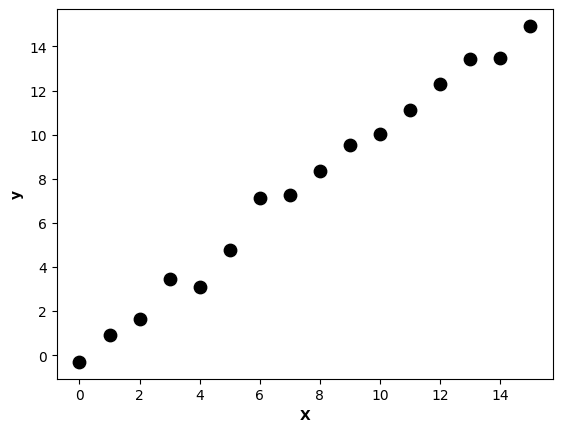

In [178]:
#plotting data
plt.scatter(X,y, color='black',s=80)
plt.xlabel('X', fontweight='bold')
plt.ylabel('y', fontweight='bold')
plt.show()

In [179]:
#%% Define the model
model = Sequential()
model.add(keras.Input(shape=(X_b.shape[1],))) # WHY?
# Single output neuron with linear activation
model.add(Dense(units=1, activation='linear'))


In [180]:
from keras.api.callbacks import EarlyStopping

In [181]:
early_stopping = EarlyStopping(
    monitor="loss",
    min_delta=0.01,
    patience=5,
    restore_best_weights=True)

In [182]:
#%% Compile the model
# Stochastic Gradient Descent (SGD)
# model.compile(optimizer='adam',loss='mean_squared_error')
# Adaptive Moment Estimation (Adam)
model.compile(optimizer='adam',loss='mean_squared_error')

In [183]:
#%% Train the model
history = model.fit(X_b, y, epochs=20000 ,callbacks=[early_stopping])

Epoch 1/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step - loss: 379.2545
Epoch 2/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 378.8447
Epoch 3/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 378.4352
Epoch 4/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 378.0259
Epoch 5/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 377.6169
Epoch 6/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 377.2081
Epoch 7/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 376.7995
Epoch 8/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 376.3912
Epoch 9/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 375.9832
Epoch 10/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 375.5754
Epoch 11/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 375.1678
Epoch 12/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 374.7605
Epoch 13/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 374.3535
Epoch 14/20000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 373.9467
Epoch 15/20000
1/1 ━━━━━━━━━

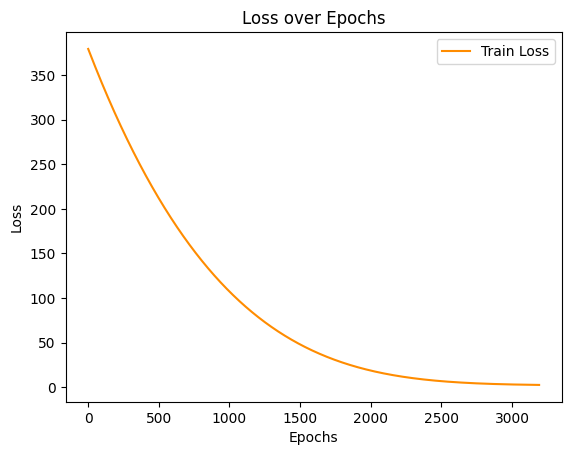

In [184]:
#%% Plotting the cost over epochs
loss_history = history.history['loss']
plt.plot(loss_history, label='Train Loss', color="darkorange")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

In [185]:
loss= model.evaluate(X_b,y)
print(f"Training loss: {loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - loss: 2.5682
Training loss: 2.5681841373443604


In [186]:
y_pred=model.predict(X_b)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


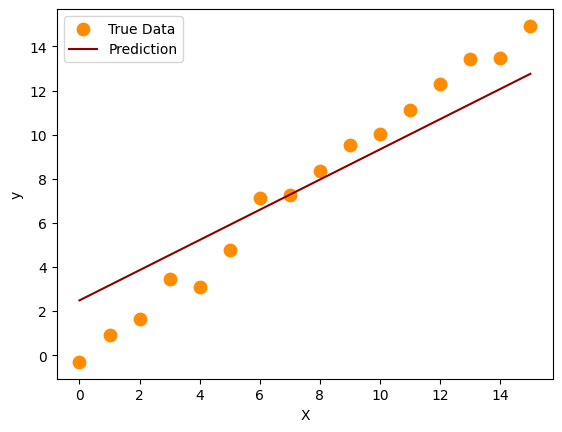

In [187]:
plt.scatter(X,y, label= 'True Data', color='darkorange', s=80)
plt.plot(X,y_pred, label='Prediction', color='darkred')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [188]:
new_X=np.array([[19],[22]])
new_X_b=np.c_[np.ones((len(new_X),1)),new_X]
print(model.predict(new_X_b))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[15.500142]
 [17.554903]]
